In [ ]:
import zipfile
import os
import shutil
from PIL import Image
import numpy as np
from collections import defaultdict

# Paths for zip file and extraction folder
zip_file_path = '/content/archive (2).zip'
extraction_path = './extracted_images'

# Extract zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)
    print(f"Files extracted to {extraction_path}")

Files extracted to ./extracted_images


In [ ]:
# Define paths for filtered and processed images
filtered_path = './filtered_children_images'  # Folder to store filtered child images
processed_path = './processed_images'  # Folder to store processed images
os.makedirs(filtered_path, exist_ok=True)
os.makedirs(processed_path, exist_ok=True)

# Function to filter images based on age in filename
def filter_children_images(input_folder, output_folder, max_age=12):
    total_copied = 0
    # Print to debug the folder being processed
    print(f"Processing folder: {input_folder}")

    for file in os.listdir(input_folder):
        try:
            print(f"Checking file: {file}")  # Debug print
            # Assuming age is the first part of the filename (e.g., '10_image.jpg')
            age = int(file.split('_')[0])  # Parse age from filename
            if 0 <= age <= max_age:  # Filter for ages 0 to 12
                shutil.copy(os.path.join(input_folder, file), os.path.join(output_folder, file))
                total_copied += 1
                print(f"Copied {file} to {output_folder}")
        except ValueError:
            print(f"Skipping file {file} - age not found in filename format.")

    print(f"Total images copied: {total_copied}")


In [ ]:
# Apply filter to keep only images of children ages 0 to 12
for folder_name in os.listdir(extraction_path):
    folder_path = os.path.join(extraction_path, folder_name)
    if os.path.isdir(folder_path):
        filter_children_images(folder_path, filtered_path)

Streaming output truncated to the last 5000 lines.
Copied 4_0_0_20170110213441609.jpg.chip.jpg to ./filtered_children_images
Checking file: 35_1_0_20170109132412553.jpg.chip.jpg
Checking file: 5_1_0_20170109191949189.jpg.chip.jpg
Copied 5_1_0_20170109191949189.jpg.chip.jpg to ./filtered_children_images
Checking file: 24_1_0_20170104022030117.jpg.chip.jpg
Checking file: 47_0_0_20170104211830788.jpg.chip.jpg
Checking file: 6_1_2_20161219162040862.jpg.chip.jpg
Copied 6_1_2_20161219162040862.jpg.chip.jpg to ./filtered_children_images
Checking file: 34_1_3_20170105002136348.jpg.chip.jpg
Checking file: 1_0_4_20161221202458409.jpg.chip.jpg
Copied 1_0_4_20161221202458409.jpg.chip.jpg to ./filtered_children_images
Checking file: 1_1_3_20161219224753152.jpg.chip.jpg
Copied 1_1_3_20161219224753152.jpg.chip.jpg to ./filtered_children_images
Checking file: 47_1_3_20170109133358794.jpg.chip.jpg
Checking file: 78_0_0_20170111222436497.jpg.chip.jpg
Checking file: 14_1_0_20170103163023120.jpg.chip.jpg


In [ ]:
# Function to process images (resize, normalize, etc.)
def process_images(folder_path, output_folder, target_size=(224, 224), normalize=True, augment=False):
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                img_path = os.path.join(root, file)
                try:
                    with Image.open(img_path) as img:
                        # Resize image
                        img = img.resize(target_size)

                        # Data Augmentation: Randomly flip or rotate images for training diversity
                        if augment:
                            img = augment_image(img)

                        # Normalize pixel values to the range [0, 1] if specified
                        if normalize:
                            img = np.array(img) / 255.0
                            img = Image.fromarray((img * 255).astype(np.uint8))  # Convert back to image for saving

                        # Save processed image to processed folder
                        img.save(os.path.join(output_folder, file))
                        print(f"Processed image {file}")
                except Exception as e:
                    print(f"Error processing {file}: {e}")

In [ ]:
# Function for simple data augmentation (flip, rotate)
def augment_image(img):
    # Random horizontal flip
    if np.random.rand() > 0.5:
        img = img.transpose(Image.FLIP_LEFT_RIGHT)

    # Random rotation between -30 and 30 degrees
    img = img.rotate(np.random.uniform(-30, 30))

    return img

# Apply processing to the filtered images
process_images(filtered_path, processed_path, normalize=True, augment=True)

Processed image 7_1_0_20170109200858883.jpg.chip.jpg
Processed image 4_1_0_20170109191412927.jpg.chip.jpg
Processed image 4_1_2_20161219141808855.jpg.chip.jpg
Processed image 1_0_3_20161219230749432.jpg.chip.jpg
Processed image 8_0_1_20170110215727788.jpg.chip.jpg
Processed image 6_0_3_20161220222811027.jpg.chip.jpg
Processed image 4_1_4_20170103205256107.jpg.chip.jpg
Processed image 2_1_2_20161219212324493.jpg.chip.jpg
Processed image 1_0_0_20161219154909149.jpg.chip.jpg
Processed image 8_0_0_20170110215618155.jpg.chip.jpg
Processed image 1_0_2_20161219203122004.jpg.chip.jpg
Processed image 1_1_0_20170109191345833.jpg.chip.jpg
Processed image 8_1_0_20170117175651555.jpg.chip.jpg
Processed image 5_1_0_20170109192408726.jpg.chip.jpg
Processed image 8_1_0_20170109204400392.jpg.chip.jpg
Processed image 3_1_2_20161219142458105.jpg.chip.jpg
Processed image 1_0_3_20161220220358441.jpg.chip.jpg
Processed image 4_0_0_20170110211454141.jpg.chip.jpg
Processed image 10_1_0_20170109203653735.jpg.c

In [ ]:
# Function to count images and categorize by age
def count_images_by_age(directory_path):
    age_count = defaultdict(int)  # Dictionary to store count per age
    total_images = 0

    try:
        for file in os.listdir(directory_path):
            # Check if the file is an image
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                # Extract age from the filename (assuming format 'age_description.jpg')
                try:
                    age = int(file.split('_')[0])
                    age_count[age] += 1
                    total_images += 1
                except ValueError:
                    print(f"Could not parse age from filename: {file}")

        return total_images, dict(age_count)

    except FileNotFoundError:
        print(f"The directory '{directory_path}' does not exist.")
        return 0, {}

# Count total images and categorize by age in the processed folder
total_images, age_count = count_images_by_age(processed_path)

# Output results
print(f"Total number of images: {total_images}")
print("Number of images by age:")
for age, count in sorted(age_count.items()):
    print(f"Age {age}: {count} images")

Total number of images: 3413
Number of images by age:
Age 1: 1123 images
Age 2: 482 images
Age 3: 289 images
Age 4: 273 images
Age 5: 196 images
Age 6: 131 images
Age 7: 139 images
Age 8: 263 images
Age 9: 166 images
Age 10: 156 images
Age 11: 65 images
Age 12: 130 images


In [ ]:
pip install tensorflow


In [ ]:
import os
import numpy as np
from PIL import Image

# Paths to your directories
train_data_dir = './processed_images'

# List all image files in the directory, excluding non-image files
train_images = [f for f in os.listdir(train_data_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

# Initialize a list to store images
train_images_data = []

# Loop through each image, open, resize, and normalize
for img_file in train_images:
    img_path = os.path.join(train_data_dir, img_file)
    try:
        img = Image.open(img_path).resize((224, 224))  # Resize image
        img = np.array(img) / 255.0  # Normalize the image to [0, 1]
        train_images_data.append(img)
        print(f"Loaded image: {img_file}")
    except Exception as e:
        print(f"Error loading {img_file}: {e}")

# Convert list to numpy array
train_images_data = np.array(train_images_data)


Loaded image: 7_1_0_20170109200858883.jpg.chip.jpg
Loaded image: 4_1_0_20170109191412927.jpg.chip.jpg
Loaded image: 4_1_2_20161219141808855.jpg.chip.jpg
Loaded image: 1_0_3_20161219230749432.jpg.chip.jpg
Loaded image: 8_0_1_20170110215727788.jpg.chip.jpg
Loaded image: 6_0_3_20161220222811027.jpg.chip.jpg
Loaded image: 4_1_4_20170103205256107.jpg.chip.jpg
Loaded image: 2_1_2_20161219212324493.jpg.chip.jpg
Loaded image: 1_0_0_20161219154909149.jpg.chip.jpg
Loaded image: 8_0_0_20170110215618155.jpg.chip.jpg
Loaded image: 1_0_2_20161219203122004.jpg.chip.jpg
Loaded image: 1_1_0_20170109191345833.jpg.chip.jpg
Loaded image: 8_1_0_20170117175651555.jpg.chip.jpg
Loaded image: 5_1_0_20170109192408726.jpg.chip.jpg
Loaded image: 8_1_0_20170109204400392.jpg.chip.jpg
Loaded image: 3_1_2_20161219142458105.jpg.chip.jpg
Loaded image: 1_0_3_20161220220358441.jpg.chip.jpg
Loaded image: 4_0_0_20170110211454141.jpg.chip.jpg
Loaded image: 10_1_0_20170109203653735.jpg.chip.jpg
Loaded image: 10_0_0_201701102

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def attention_block(input_tensor):
    """
    Attention block that gives importance to different parts of the image.
    Uses a simple self-attention mechanism.
    """
    # Attention mechanism
    attention = layers.Conv2D(1, (1, 1), activation='sigmoid')(input_tensor)
    attention = layers.Multiply()([input_tensor, attention])
    return attention

def create_custom_cnn(input_shape=(224, 224, 3)):
    input = layers.Input(shape=input_shape)

    # First convolution block
    x = layers.Conv2D(64, (3, 3), activation='relu')(input)
    x = layers.MaxPooling2D((2, 2))(x)

    # Second convolution block
    x = layers.Conv2D(128, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Third convolution block
    x = layers.Conv2D(256, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # Apply Attention mechanism
    x = attention_block(x)

    # Flatten and fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)

    # Final output layer
    output = layers.Dense(128, activation='relu')(x)  # Embedding for face recognition

    # Build the model
    model = models.Model(inputs=input, outputs=output)
    return model

# Define the model
model = create_custom_cnn(input_shape=(224, 224, 3))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 222, 222, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 111, 111, 64)   │              0 │ conv2d[0][0]           │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 109, 109, 128)  │         73,856 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 54, 54, 128)    │              0 │ conv2d_1[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 52, 52, 256)    │        295,168 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 26, 26, 256)    │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 26, 26, 1)      │            257 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 26, 26, 256)    │              0 │ max_pooling2d_2[0][0], │
│                           │                        │                │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ flatten (Flatten)         │ (None, 173056)         │              0 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 512)            │     88,605,184 │ flatten[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 128)            │         65,664 │ dense[0][0]            │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 89,041,921 (339.67 MB)

 Trainable params: 89,041,921 (339.67 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import cv2
import os

# Step 1: Extract embeddings from the model for the entire dataset
def extract_embeddings(model, image_dir):
    embeddings = []
    image_paths = []

    for img_file in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))  # Resize to match the input size
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        img = img / 255.0  # Normalize image

        embedding = model.predict(img)
        embeddings.append(embedding.flatten())  # Flatten to get a 1D vector
        image_paths.append(img_path)

    return np.array(embeddings), image_paths

# Step 2: Find the most similar image to the test image
def find_similar_image(model, test_image_path, image_paths, embeddings):
    # Preprocess the test image
    test_img = cv2.imread(test_image_path)
    test_img = cv2.resize(test_img, (224, 224))
    test_img = np.expand_dims(test_img, axis=0)
    test_img = test_img / 255.0

    # Extract the test image embedding
    test_embedding = model.predict(test_img).flatten()

    # Use Nearest Neighbors to find the closest match
    nbrs = NearestNeighbors(n_neighbors=1, metric='cosine').fit(embeddings)
    distances, indices = nbrs.kneighbors([test_embedding])
    # Get the most similar image
    most_similar_image_path = image_paths[indices[0][0]]
    print(f"Most similar image: {most_similar_image_path}")
    print(f"Distance: {distances[0][0]}")




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [ ]:
# Step 3: Example usage
embeddings, image_paths = extract_embeddings(model, './processed_images')
find_similar_image(model, '/content/test1_glasses.jpeg', image_paths, embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [16]:
find_similar_image(model, '/content/test1_glasses.jpeg', image_paths, embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
Most similar image: ./processed_images/4_1_0_20170104005345015.jpg.chip.jpg
Distance: 0.008527636528015137


In [53]:
find_similar_image(model, '/content/test2.jpg', image_paths, embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
Most similar image: ./processed_images/7_1_3_20161220222848971.jpg.chip.jpg
Distance: 0.017618536949157715


In [35]:
find_similar_image(model, '/content/test3.jpg', image_paths, embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Most similar image: ./processed_images/9_1_1_20170117105556810.jpg.chip.jpg
Distance: 0.015432596206665039


In [36]:
find_similar_image(model, '/content/test4.jpg', image_paths, embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
Most similar image: ./processed_images/4_1_2_20161219211452533.jpg.chip.jpg
Distance: 0.019288301467895508


In [55]:
find_similar_image(model, '/content/test5.jpg', image_paths, embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Most similar image: ./processed_images/4_1_0_20170103223021271.jpg.chip.jpg
Distance: 0.012213826179504395


In [54]:
find_similar_image(model, '/content/test6.jpg', image_paths, embeddings)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Most similar image: ./processed_images/7_1_3_20161220222848971.jpg.chip.jpg
Distance: 0.01405644416809082


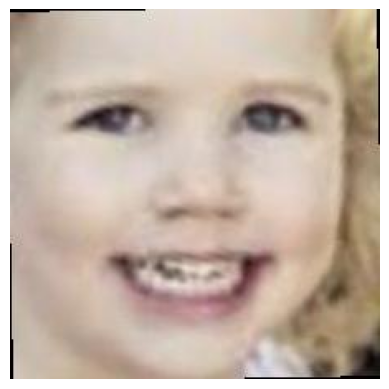

In [17]:
import cv2
import matplotlib.pyplot as plt

# Function to display an image using OpenCV and Matplotlib
def display_image(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Convert the image from BGR (OpenCV default) to RGB (Matplotlib format)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes for better display
    plt.show()

# Example usage
display_image('./processed_images/4_1_0_20170104005345015.jpg.chip.jpg')


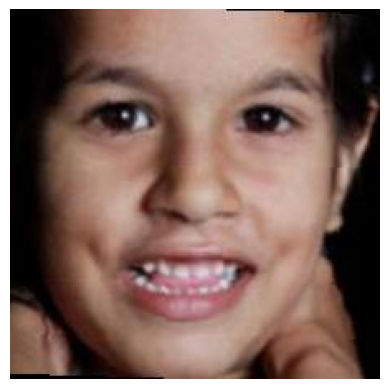

In [49]:
display_image('./processed_images/7_1_3_20161220222848971.jpg.chip.jpg')

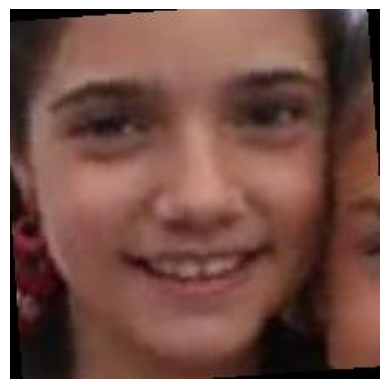

In [34]:
display_image('./processed_images/12_1_4_20161223230033380.jpg.chip.jpg')

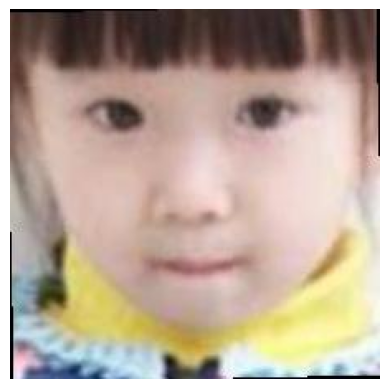

In [38]:
display_image('./processed_images/4_1_2_20161219211452533.jpg.chip.jpg')

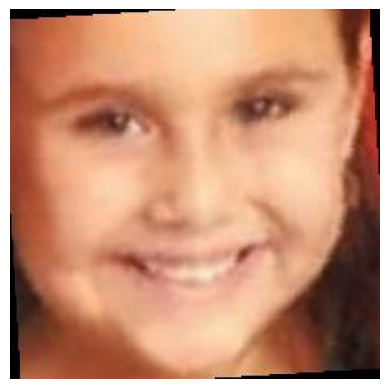

In [56]:
display_image('./processed_images/4_1_0_20170103223021271.jpg.chip.jpg')

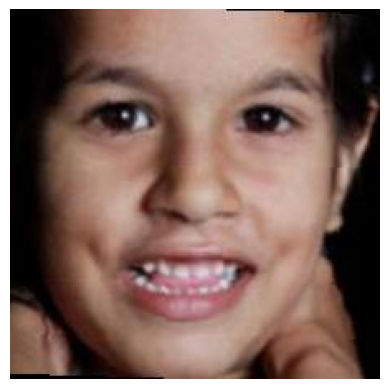

In [51]:
display_image('./processed_images/7_1_3_20161220222848971.jpg.chip.jpg')